# Importing Libraries & Uploading Files

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

In [3]:
res_2014 = pd.read_csv(r"C:\Users\m\Taha\Codebasics Challenges\Parliament Elections\RPC11_Input_For_Participants\datasets\results_2014.csv")
res_2019 = pd.read_csv(r"C:\Users\m\Taha\Codebasics Challenges\Parliament Elections\RPC11_Input_For_Participants\datasets\results_2019.csv")
states_codes = pd.read_csv(r"C:\Users\m\Taha\Codebasics Challenges\Parliament Elections\RPC11_Input_For_Participants\datasets\dim_states_codes.csv")

# EDA

In [4]:
res_2014.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282


In [5]:
res_2019.head()

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,MALE,72.0,ST,TDP,Bicycle,336163,1938,338101,1451418
1,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,MALE,54.0,ST,BJP,Lotus,17578,289,17867,1451418
2,Andhra Pradesh,Aruku,GODDETI. MADHAVI,FEMALE,26.0,ST,YSRCP,Ceiling Fan,557561,4629,562190,1451418
3,Andhra Pradesh,Aruku,SHRUTI DEVI VYRICHERLA,FEMALE,46.0,ST,INC,Hand,17656,74,17730,1451418
4,Andhra Pradesh,Aruku,GANGULAIAH VAMPURU.,MALE,49.0,ST,JnP,Glass Tumbler,42245,549,42794,1451418


In [6]:
states_codes.head()

,state_name,abbreviation
0,Andaman & Nicobar Islands,AN
1,Andhra Pradesh,AP
2,Arunachal Pradesh,AR
3,Assam,AS
4,Bihar,BR


In [7]:
states_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state_name    36 non-null     object
 1   abbreviation  36 non-null     object
dtypes: object(2)
memory usage: 708.0+ bytes


In [8]:
# Adding Year Column
res_2019['Year']=2019
res_2014['Year']=2014

In [9]:
# Combining the two datasets
df = pd.concat([res_2014,res_2019]).reset_index().drop('index', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16952 entries, 0 to 16951
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           16952 non-null  object 
 1   pc_name         16952 non-null  object 
 2   candidate       16952 non-null  object 
 3   sex             15899 non-null  object 
 4   age             15899 non-null  float64
 5   category        15899 non-null  object 
 6   party           16952 non-null  object 
 7   party_symbol    16409 non-null  object 
 8   general_votes   16952 non-null  int64  
 9   postal_votes    16952 non-null  int64  
 10  total_votes     16952 non-null  int64  
 11  total_electors  16952 non-null  int64  
 12  Year            16952 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.7+ MB


In [10]:
df.isnull().sum()

state                0
pc_name              0
candidate            0
sex               1053
age               1053
category          1053
party                0
party_symbol       543
general_votes        0
postal_votes         0
total_votes          0
total_electors       0
Year                 0
dtype: int64

In [11]:
df.nunique()

state                36
pc_name             545
candidate         14933
sex                   6
age                  64
category              5
party               899
party_symbol        257
general_votes     10592
postal_votes       1602
total_votes       10635
total_electors     1053
Year                  2
dtype: int64

# Dropping Duplicates

In [12]:
df.drop_duplicates(inplace = True)
df.shape

(16952, 13)

# Fix Typos

In [13]:
# copy and paste it to chatgpt to find typos and duplicates
df['pc_name'].unique()

array(['Adilabad ', 'Peddapalle ', 'Karimnagar ', 'Nizamabad',
       'Zahirabad', 'Medak', 'Malkajgiri', 'Secundrabad', 'Hyderabad',
       'CHELVELLA', 'Mahbubnagar', 'Nagarkurnool', 'Nalgonda', 'Bhongir ',
       'Warangal', 'Mahabubabad  ', 'Khammam ', 'Aruku ', 'Srikakulam',
       'Vizianagaram', 'Visakhapatnam', 'Anakapalli', 'Kakinada',
       'Amalapuram ', 'Rajahmundry', 'Narsapuram', 'Eluru ',
       'Machilipatnam ', 'Vijayawada', 'Guntur', 'Narasaraopet',
       'Bapatla ', 'Ongole ', 'Nandyal', 'Kurnool', 'Anantapur',
       'Hindupur', 'Kadapa', 'Nellore', 'Tirupati ', 'Rajampet',
       'Chittoor ', 'ARUNACHAL WEST', 'ARUNACHAL EAST', 'Karimganj ',
       'Silchar', 'Autonomous District', 'Dhubri', 'Kokrajhar', 'Barpeta',
       'Gauhati', 'Mangaldoi', 'Tezpur', 'Nowgong', 'Kaliabor', 'Jorhat',
       'Dibrugarh', 'Lakhimpur', 'Valmiki Nagar', 'Paschim Champaran',
       'Purvi Champaran', 'Sheohar', 'Sitamarhi', 'Madhubani',
       'Jhanjharpur', 'Supaul', 'Araria', 'K

In [14]:
df.loc[df['pc_name'].str.lower().isin(['chelvella' , 'chevella']), 'pc_name'] = 'Chevella'

In [15]:
df.loc[df['pc_name'].str.lower().isin(['bardhaman durgapur' , 'bardhaman - durgapur']), 'pc_name'] = 'Bardhaman - Durgapur'

In [16]:
df.loc[df['pc_name'].str.lower().isin(['joynagar ' , 'jaynagar']), 'pc_name'] = 'Joynagar'

In [17]:
df['pc_name'].nunique()

543

# Normalizing Categorical Columns

In [18]:
df['sex'].unique()

array(['M', nan, 'F', 'O', 'MALE', 'FEMALE', 'THIRD'], dtype=object)

In [19]:
df['category'].unique()

array(['ST', nan, 'SC', 'GEN', 'Gen', 'GENERAL'], dtype=object)

In [20]:
# Sex
df['sex'] = df['sex'].replace(to_replace = ['THIRD', 'O', np.nan],value = 'Not-Specified')
df.loc[df['sex'] == 'M', 'sex'] = 'MALE'
df.loc[df['sex'] == 'F', 'sex'] = 'FEMALE'

# Category
df.loc[df['category'].isin(['Gen', 'GENERAL', np.nan]), 'category'] = 'GEN'

# NOTA
df['candidate'] = df['candidate'].str.title().replace(to_replace = ['None Of The Above'],value = 'Nota')


# Filling  Null Values

In [21]:
df['sex'].value_counts(normalize = True) * 100

sex
MALE             85.718499
FEMALE            7.999056
Not-Specified     6.282445
Name: proportion, dtype: float64

In [22]:
df['category'].value_counts(normalize = True) * 100

category
GEN    68.953516
SC     24.309816
ST      6.736668
Name: proportion, dtype: float64

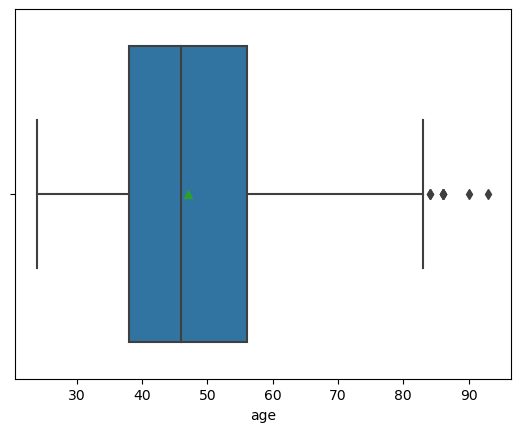

In [23]:
sns.boxplot(x = 'age', data = df, showmeans = True)
plt.show()

In [24]:
df[df['party_symbol'].isnull()]['party'].unique()

array(['NOTA'], dtype=object)

In [25]:
df.loc[df['party_symbol'].isnull(), 'party_symbol'] = 'NOTA'
df.loc[df['age'].isnull(), 'age'] = df['age'].mean().round()

df.isnull().sum()

state             0
pc_name           0
candidate         0
sex               0
age               0
category          0
party             0
party_symbol      0
general_votes     0
postal_votes      0
total_votes       0
total_electors    0
Year              0
dtype: int64

# Cleaning String Columns and Changing dtypes

In [26]:
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):   
        df[column] = df[column].astype(int) 
    else:
        df[column] = df[column].str.strip().str.title()
        
df['party'] = df['party'].str.upper()
df['category'] = df['category'].str.upper()

# Feature Engineering

In [27]:
# Adding the Candidate Rank
query = """
select
    *,
    row_number() over(partition by pc_name, Year order by total_votes desc) as candidate_rank
from
    df
"""
df_ranked = sqldf(query)
df_ranked

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,Year,candidate_rank
0,Andhra Pradesh,Adilabad,Godam Nagesh,Male,49,ST,TRS,Car,425762,5085,430847,1386282,2014,1
1,Andhra Pradesh,Adilabad,Naresh,Male,37,ST,INC,Hand,257994,1563,259557,1386282,2014,2
2,Andhra Pradesh,Adilabad,Ramesh Rathod,Male,48,ST,TDP,Bicycle,182879,1319,184198,1386282,2014,3
3,Andhra Pradesh,Adilabad,Rathod Sadashiv,Male,55,ST,BSP,Elephant,94363,57,94420,1386282,2014,4
4,Andhra Pradesh,Adilabad,Nethawath Ramdas,Male,44,ST,IND,Auto- Rickshaw,41028,4,41032,1386282,2014,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16947,Telangana,Zahirabad,Benjamin Raju,Male,49,GEN,IND,Gift Pack,3279,2,3281,1498666,2019,9
16948,Telangana,Zahirabad,Nangunoori Latha,Female,43,GEN,IND,Bat,1866,3,1869,1498666,2019,10
16949,Telangana,Zahirabad,Mohammed Nawaz,Male,33,GEN,ANC,Gramophone,1710,2,1712,1498666,2019,11
16950,Telangana,Zahirabad,Mark Babu,Male,33,SC,IPBP,Trumpet,1572,1,1573,1498666,2019,12


In [28]:
# Adding The Total Votes For Each Constituency
query = """
select 
    pc_name,
    Year,
    sum(total_votes) as pc_votes,
    sum(total_electors) as pc_electors
from
    df
group by
    pc_name, Year

"""
pc_votes = sqldf(query)
pc_votes

,pc_name,Year,pc_votes,pc_electors
0,Adilabad,2014,1045839,12476538
1,Adilabad,2019,1063730,17877480
2,Agra,2014,1070400,29035824
3,Agra,2019,1145323,19376900
4,Ahmadnagar,2014,1062318,23870070
...,...,...,...,...
1043,West Delhi,2019,1441601,56919456
1044,Yavatmal-Washim,2014,1032949,47392884
1045,Yavatmal-Washim,2019,1174220,47904625
1046,Zahirabad,2014,1094806,15898894


In [29]:
# Adding The Total Votes For Each State
query = """
select 
    state,
    Year,
    sum(total_votes) as state_votes,
    sum(total_electors) as state_electors
from
    df
group by
    state, Year

"""
state_votes = sqldf(query)
state_votes

,state,Year,state_votes,state_electors
0,Andaman & Nicobar Islands,2014,190328,4309760
1,Andaman & Nicobar Islands,2019,207296,5095536
2,Andhra Pradesh,2014,48367188,1028145613
3,Andhra Pradesh,2019,31612534,544490417
4,Arunachal Pradesh,2014,596956,5270576
...,...,...,...,...
64,Uttar Pradesh,2019,86481398,1933793504
65,Uttarakhand,2014,4391890,116314047
66,Uttarakhand,2019,4842925,90898576
67,West Bengal,2014,51631828,766620622


In [30]:
# Adding The Total Votes For Each Party
query = """
select
    *,
    row_number() over(partition by pc_name, Year order by party_votes desc) as party_rank
from
(
select
    pc_name,
    party,
    Year,
    sum(total_votes) as party_votes
from
    df
group by
    pc_name, party, Year
                            ) as sub

"""
party_votes = sqldf(query)
party_votes

,pc_name,party,Year,party_votes,party_rank
0,Adilabad,TRS,2014,430847,1
1,Adilabad,INC,2014,259557,2
2,Adilabad,TDP,2014,184198,3
3,Adilabad,BSP,2014,94420,4
4,Adilabad,IND,2014,59733,5
...,...,...,...,...,...
11354,Zahirabad,BMUP,2019,6366,6
11355,Zahirabad,BARP,2019,6339,7
11356,Zahirabad,ANC,2019,1712,8
11357,Zahirabad,IPBP,2019,1573,9


# Updating The DataFrame

In [31]:
# adding the pc votes and electors
step1 = pd.merge(df_ranked, pc_votes, on = ['pc_name', 'Year'])
# adding the state votes and electors
step2 = pd.merge(step1, state_votes, on = ['state', 'Year'])
# adding the party votes and rank
df = pd.merge(step2, party_votes, on = ['pc_name', 'party', 'Year'])

# Saving The Results To a CSV File

In [32]:
# df.to_csv('LOK SABHA.csv', index=False)

In [33]:
df.columns

Index(['state', 'pc_name', 'candidate', 'sex', 'age', 'category', 'party',
       'party_symbol', 'general_votes', 'postal_votes', 'total_votes',
       'total_electors', 'Year', 'candidate_rank', 'pc_votes', 'pc_electors',
       'state_votes', 'state_electors', 'party_votes', 'party_rank'],
      dtype='object')